# Prepare a model for glass classification using KNN


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
glass = pd.read_csv("Glass.csv")

In [3]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
glass.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [5]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
glass.shape

(214, 10)

In [7]:
glass.duplicated().sum()

1

In [8]:
glass.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Length: 214, dtype: bool

In [9]:
glass[glass.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [10]:
glass = glass.drop_duplicates()

In [11]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

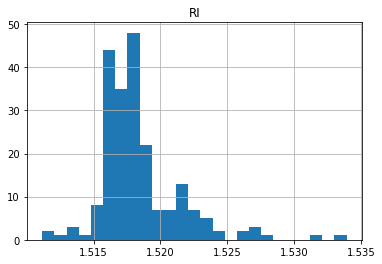

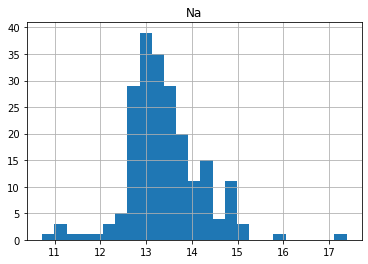

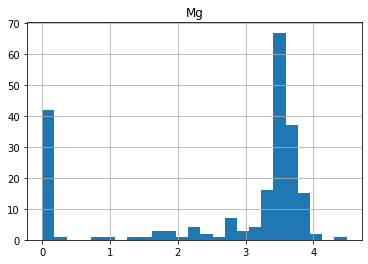

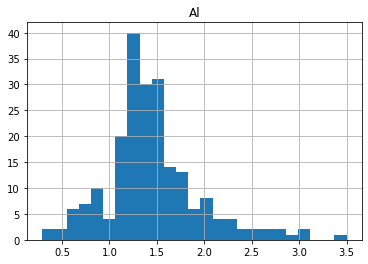

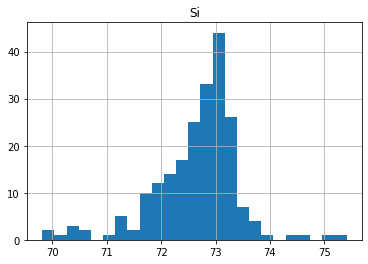

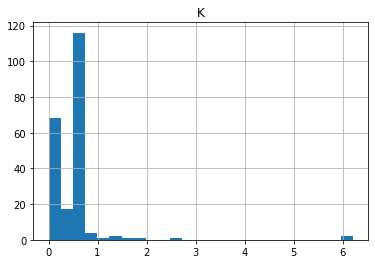

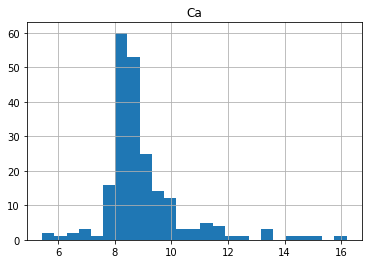

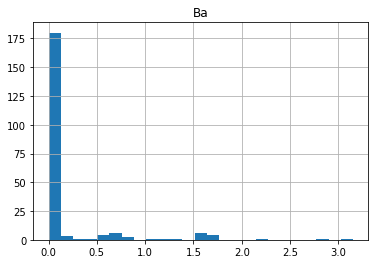

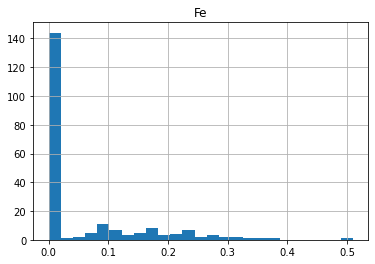

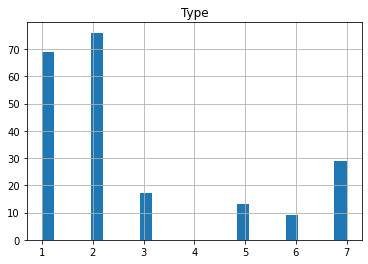

In [12]:
for feature in glass:
    data = glass.copy()
    data[feature].hist(bins=25)
    plt.title(feature)
    plt.show()

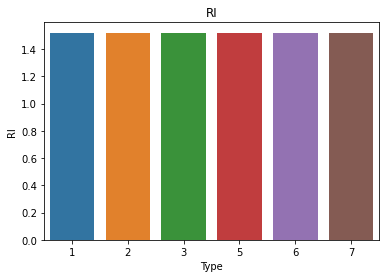

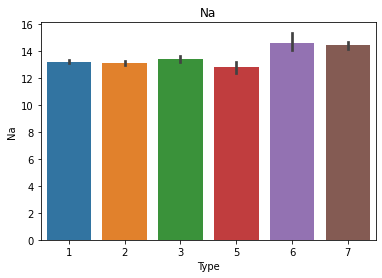

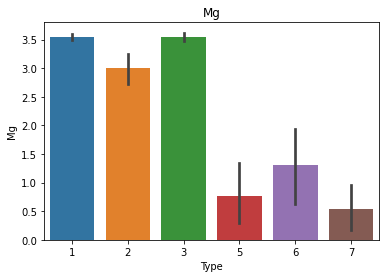

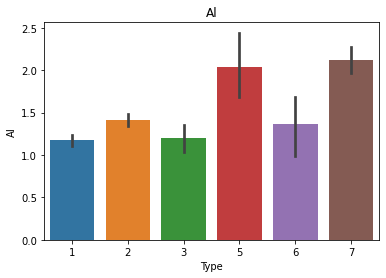

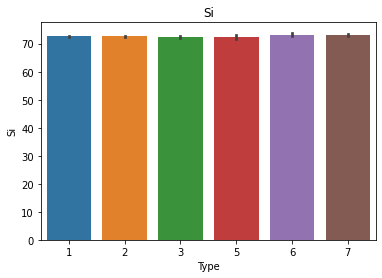

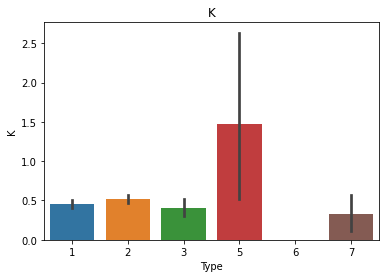

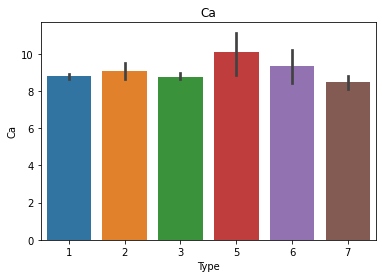

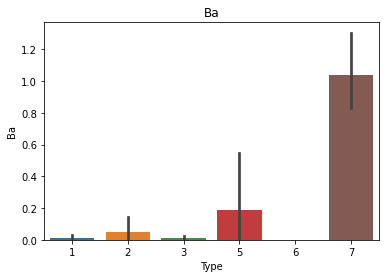

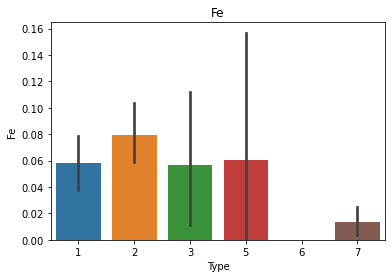

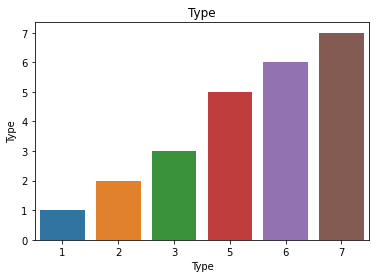

In [13]:
for feature in glass:
    data = glass.copy()
    sns.barplot('Type',feature,data=data)
    plt.title(feature)
    plt.show()

# Creating Model

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV

# Transforming into Standardized Data

In [15]:
sc = StandardScaler()

In [16]:
glass_std=sc.fit_transform(glass.drop('Type',axis=1))
glass_std

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

In [17]:
glass_std=pd.DataFrame(glass_std,columns=glass.columns[:-1])
glass_std

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301
...,...,...,...,...,...,...,...,...,...
208,-0.699888,0.903249,-1.860172,2.891336,-0.058368,-0.642789,0.158812,1.778672,-0.588301
209,-0.494986,1.860605,-1.860172,1.092483,0.524398,-0.765554,-0.389506,2.844912,-0.588301
210,0.760865,1.173272,-1.860172,1.153118,0.990612,-0.765554,-0.361387,2.945501,-0.588301
211,-0.607351,1.197820,-1.860172,0.991424,1.236668,-0.765554,-0.333268,2.804676,-0.588301


In [18]:
X = glass_std.iloc[:,0:]
Y = glass.iloc[:, -1]

# Spliting into Train_Test Data

In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [20]:
X_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
13,-0.286779,-0.667799,0.611539,-0.362769,0.718654,0.063112,-0.403566,-0.353808,1.157796
111,3.113932,-0.937823,-1.860172,-1.575479,-0.822439,-0.673480,3.828329,-0.353808,-0.588301
158,-0.128145,0.117725,0.472679,0.364857,-0.926042,0.109149,-0.101287,-0.353808,0.336103
24,-0.379315,-0.029561,0.569881,-0.605311,0.252441,0.001729,-0.368417,-0.353808,-0.588301
30,-0.220682,-0.925549,0.611539,-0.302134,0.550299,0.170531,-0.185644,-0.353808,0.849661
...,...,...,...,...,...,...,...,...,...
67,1.048389,-0.348680,0.625425,-1.110607,-0.589333,-0.412604,0.608715,-0.353808,1.055084
192,-0.382620,1.651951,-1.860172,1.112695,0.472597,-0.765554,-0.298120,2.844912,0.233392
117,-0.534644,-0.127751,0.667083,0.162738,-0.161971,0.231914,-0.649606,-0.353808,2.390335
47,1.283034,-0.238216,0.757342,-1.332937,-0.861290,-0.566060,0.749309,-0.353808,-0.588301


In [21]:
X_test

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
196,-0.356181,1.590582,-1.860172,1.799897,0.809306,-0.765554,-0.002871,0.973963,-0.588301
37,-0.124840,-0.815085,0.555995,-0.201075,0.394895,0.216568,-0.192674,-0.353808,-0.588301
89,0.020574,-0.581882,0.736513,-0.686159,-0.485730,0.216568,0.004158,-0.353808,1.671354
166,0.443597,-0.937823,-1.860172,0.405281,1.417973,-0.182419,1.810798,-0.353808,-0.588301
150,0.965767,1.124177,0.847601,-1.252090,-1.495858,-0.765554,0.376734,-0.353808,-0.588301
...,...,...,...,...,...,...,...,...,...
154,-0.623876,-0.446870,0.500451,-0.382981,0.459647,0.032420,-0.262971,-0.353808,-0.588301
156,0.945938,0.768237,0.750399,-1.757386,-1.120298,-0.596752,0.489210,-0.353808,-0.588301
8,0.275049,0.780510,0.625425,-0.160651,-0.744737,0.093803,-0.459803,-0.353808,-0.588301
40,-0.263645,-0.851906,0.514337,-0.504252,0.705704,0.139840,-0.220793,-0.353808,-0.588301


In [22]:
Y_train

13     1
112    2
159    3
24     1
30     1
      ..
68     1
193    7
118    2
48     1
173    5
Name: Type, Length: 149, dtype: int64

In [23]:
Y_test

197    7
37     1
90     2
167    5
151    3
      ..
155    3
157    3
8      1
41     1
130    2
Name: Type, Length: 64, dtype: int64

In [24]:
num_folds=5
kfold = KFold(n_splits=5)

# Applying KNN

In [25]:
model = KNeighborsClassifier(n_neighbors=1,metric='euclidean')
model.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [26]:
preds = model.predict(X_test)
pd.Series(preds).value_counts()

1    29
2    23
7     6
3     2
5     2
6     2
dtype: int64

In [27]:
print(classification_report(Y_test,preds))

              precision    recall  f1-score   support

           1       0.66      0.95      0.78        20
           2       0.70      0.64      0.67        25
           3       0.50      0.12      0.20         8
           5       0.50      0.50      0.50         2
           6       0.50      0.50      0.50         2
           7       1.00      0.86      0.92         7

    accuracy                           0.69        64
   macro avg       0.64      0.60      0.59        64
weighted avg       0.68      0.69      0.66        64



In [28]:
accuracy_score(Y_test,preds)

0.6875

# Checking Best value for K

In [29]:
n_neighbors = np.array([2*i+1 for i in range(1,40)])
param_grid = dict(n_neighbors=n_neighbors)
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5,scoring='accuracy')
grid.fit(X, Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69,
       71, 73, 75, 77, 79])},
             scoring='accuracy')

In [30]:
print(grid.best_score_)
print(grid.best_params_)

0.6527131782945736
{'n_neighbors': 3}


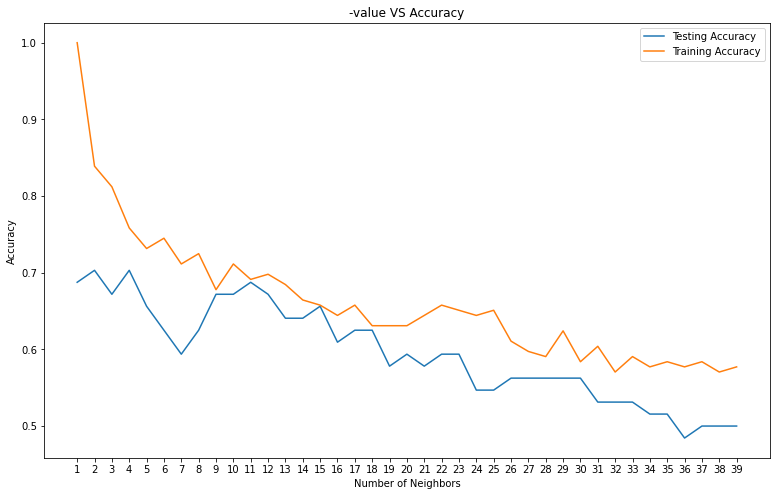

Best accuracy is 0.703125 with K = 2


In [31]:
k_values = np.arange(1,40)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    train_accuracy.append(knn.score(X_train,Y_train))
    test_accuracy.append(knn.score(X_test,Y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

# As we can see the above graph the optimal value of K is 2 and also accuracy has been increased

In [32]:
model2 = KNeighborsClassifier(n_neighbors=2,metric="euclidean")
model2.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [33]:
preds2=model2.predict(X_test)
pd.Series(preds2).value_counts()

1    33
2    22
7     6
5     2
6     1
dtype: int64

In [34]:
print(classification_report(Y_test,preds2))

              precision    recall  f1-score   support

           1       0.58      0.95      0.72        20
           2       0.82      0.72      0.77        25
           3       0.00      0.00      0.00         8
           5       0.50      0.50      0.50         2
           6       1.00      0.50      0.67         2
           7       1.00      0.86      0.92         7

    accuracy                           0.70        64
   macro avg       0.65      0.59      0.60        64
weighted avg       0.66      0.70      0.66        64



In [35]:
accuracy_score(Y_test,preds2)

0.703125